In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/data/wines/train.csv")

In [4]:
X = data.drop(["type", "quality"], axis=1)

# convert wine type to a numeric variable
X["red"] = 1. * (data["type"] == "red")

In [5]:
#clustering the 12 input vars into 6 clusters
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6)
model.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [6]:
X[model.labels_ == 2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red
2,7.3,0.220,0.50,13.70,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,0.0
3,7.6,0.670,0.14,1.50,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,0.0
7,6.9,0.380,0.29,13.65,0.048,52.0,189.0,0.99784,3.00,0.60,9.5,0.0
12,8.1,0.300,0.49,8.10,0.037,26.0,174.0,0.99430,3.10,0.30,11.2,0.0
16,6.8,0.230,0.29,15.40,0.073,56.0,173.0,0.99840,3.06,0.41,8.7,0.0
21,7.3,0.340,0.30,9.40,0.057,34.0,178.0,0.99554,3.15,0.44,10.4,0.0
23,5.7,0.280,0.24,17.50,0.044,60.0,167.0,0.99890,3.31,0.44,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3972,9.3,0.200,0.33,1.70,0.050,28.0,178.0,0.99540,3.16,0.43,9.0,0.0
3976,7.1,0.320,0.29,4.00,0.038,33.0,170.0,0.99463,3.27,0.64,10.2,0.0


In [7]:
# #PCA in scikit learn

# from sklearn.decomposition import PCA
# pca_model = PCA(n_components = 2)
# pca_model.fit(X)
# scores = pca_model.transform(X)

# plt.plot(scores[:,0], scores[:,1], '.') # first princ component, second princ component; centers data for you

# # In class exercise

#find the first two principal components of the 12 input variables in the wine data and use this to visualize the wine data

In [8]:
#interpreting principal component 2 vs princ component 1 graph (from 3D data):......

from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
pca_model.fit(X)
scores = pca_model.transform(X) # [first p comp, second p comp]

In [9]:
scores

array([[  -1.69995307,   11.04118662],
       [  24.35746377,   -5.23916886],
       [ -78.38636301,   -8.31293442],
       ..., 
       [  -7.14866179,    9.30508899],
       [  -5.35298096,   -4.55926601],
       [-109.22944711,    8.27800386]])

In [10]:
scores = pca_model.fit_transform(X)

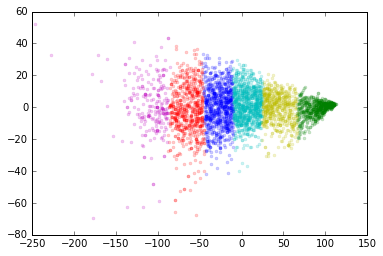

In [11]:
for i in range(6):
    plt.plot(scores[model.labels_ == i,0], scores[model.labels_ == i,1], '.', alpha = .2)

# Dimensionality Reduction

#When trying to interpret data, it's difficult to go beynd 2/3 dimensions

#want to break it down to a few variables so we can analyze more easily

#in pca for 2dm we are trying to get dist from both variables  to the line. I ncontrast, line reg
#only cares about dist of one var to reg line